# Bank Deposit Classification - Ivan Sebastian

## Problem

Our Bank Marketing Team has trouble in getting more people to deposit their money. They have tried their best but of all the customers they reached out to, only around half of them deposits their money. As Benjamin Franklin would say **Time is money**, use data to redict if a customer will deposit their money in the bank and find out features of a customer that are more likely to deposit their money.

## Hypothesis

- High-salary jobs will deposit
- Higher education will deposit
- Has no housing loan will deposit
- Has no personal loan will deposit
- Higher balance will deposit

## Desc:
- **age**: age of the client
- **job**: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- **marital**: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- **education**: (categorical: primary, secondary, tertiary and unknown)
- **default**: has credit in default? (categorical: 'no','yes','unknown')
- **housing**: has housing loan? (categorical: 'no','yes','unknown')
- **loan**: has personal loan? (categorical: 'no','yes','unknown')
- **balance**: Balance of the individual.
- **contact**: contact communication type (categorical: 'cellular','telephone')
- **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- **day**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- **duration**: last contact duration, in seconds (numeric).
- **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- **previous**: number of contacts performed before this campaign and for this client (numeric)
- **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- **deposit** : has the client subscribed a term deposit? (binary: 'yes','no')

## Dataset Source
https://www.kaggle.com/janiobachmann/bank-marketing-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Exploratory Data Analysis (EDA)

- The marketing team targeted the campaign mostly for people with management and blue-collar job, but most of the people with blue-collar job didn't deposit in the end
- Retired people and students have higher chance of depositing their money, maybe we can shift some of our marketing target campaign to them.
- Single people are more likely to deposit their money than married people.
- People with no housing loan are more likely to deposit
- People with successful previous outcome from the previous campaign are more likely to deposit their money again, while people with failure from previous campaign outcome is more 50-50, this means they will likely try to deposit money even if they didn't want to before.
- The average age of clients is 41 years old, with older people more likely to deposit.

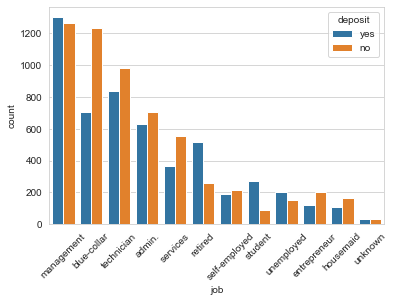

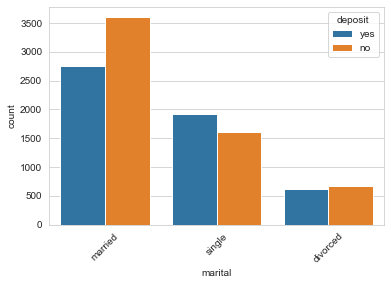

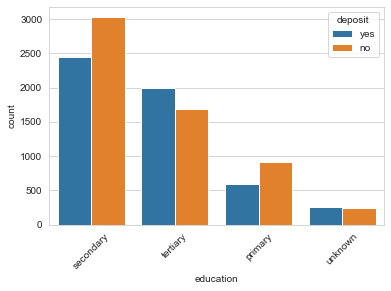

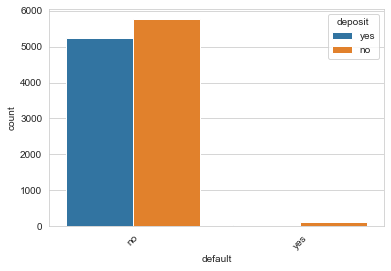

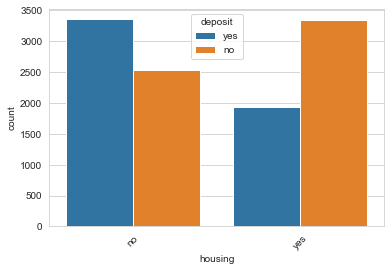

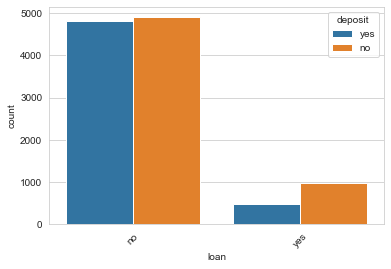

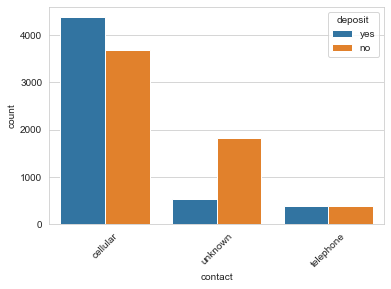

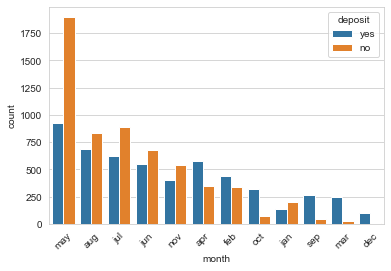

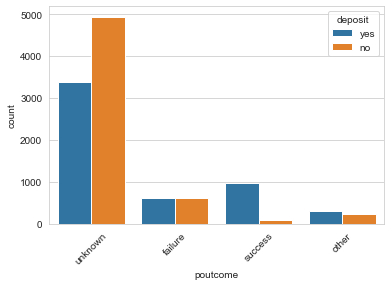

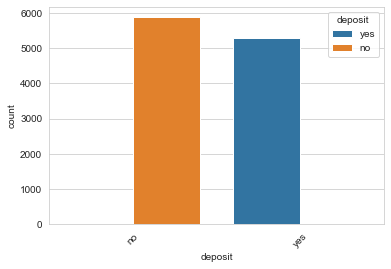

In [5]:
for i in df.columns:
    if df[i].dtypes == 'O':
        sns.countplot(df[i],hue=df['deposit'], order=df[i].value_counts().index)
        plt.xticks(rotation=45)
        plt.show()

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


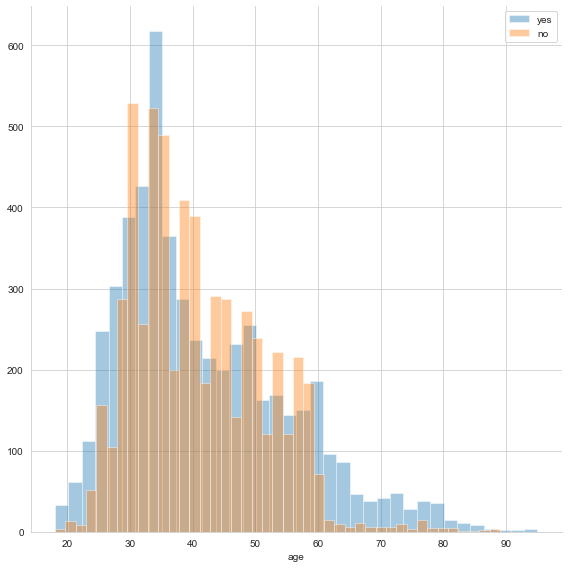

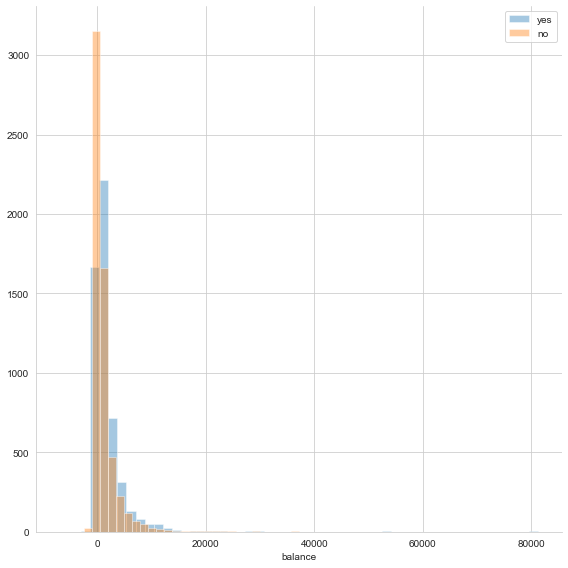

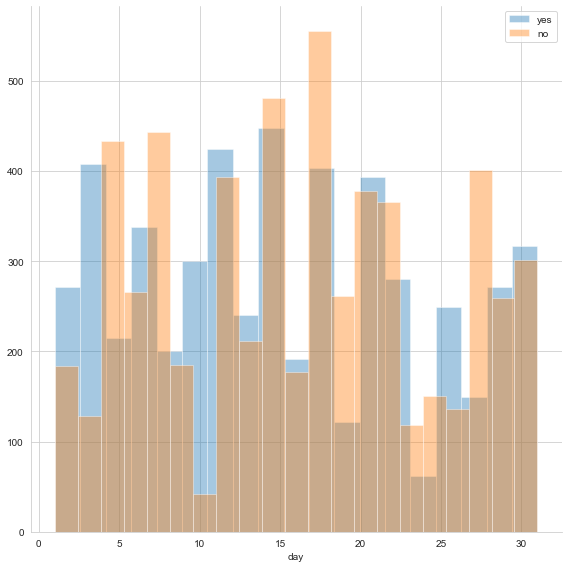

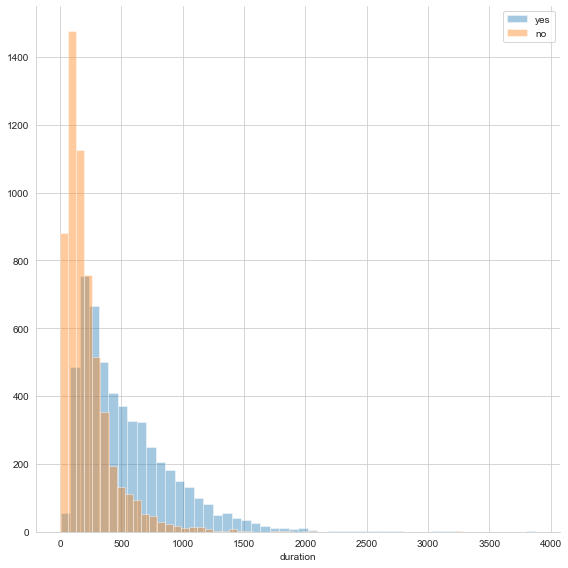

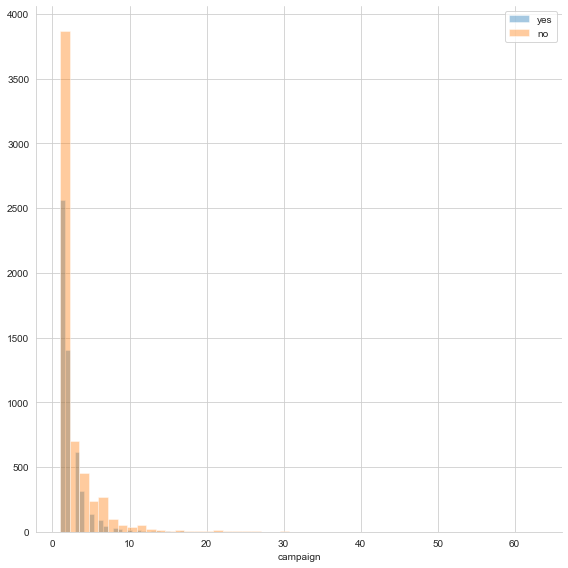

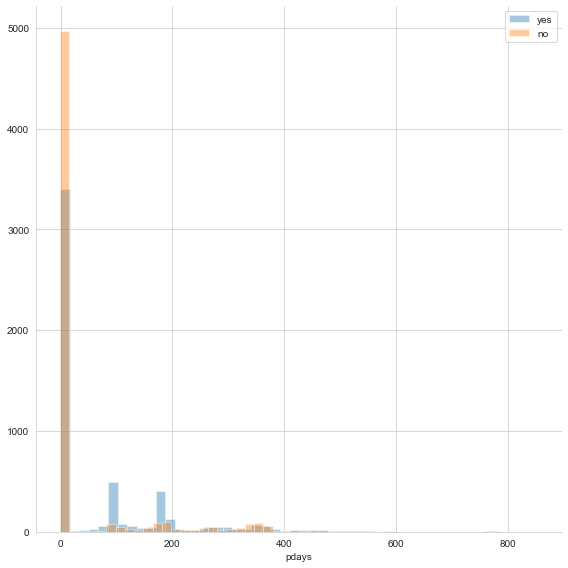

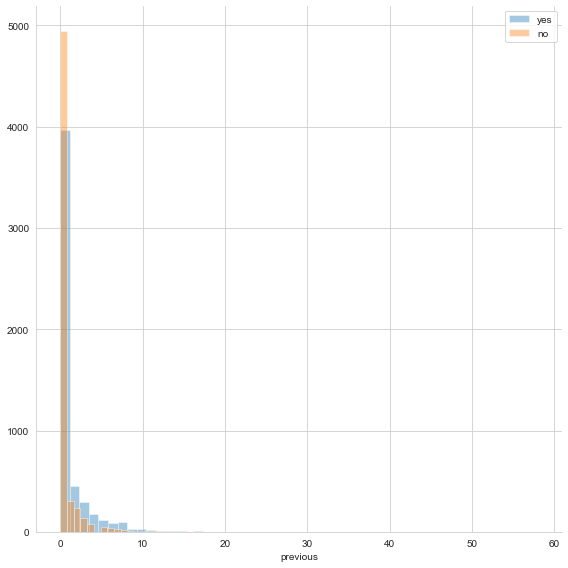

In [7]:
for i in df.columns:
    if df[i].dtypes != 'O':
        g = sns.FacetGrid(df, hue='deposit', height=8)
        g = g.map(sns.distplot, i, kde=False)
        plt.legend()
        plt.show()

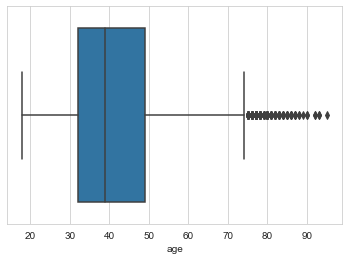

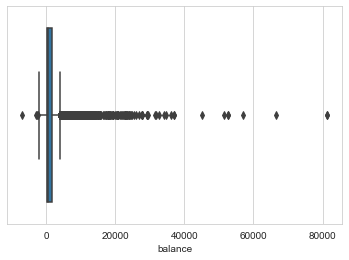

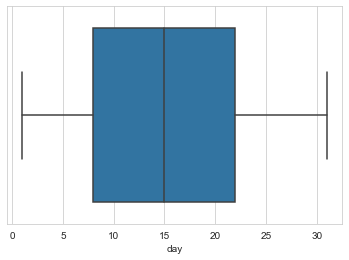

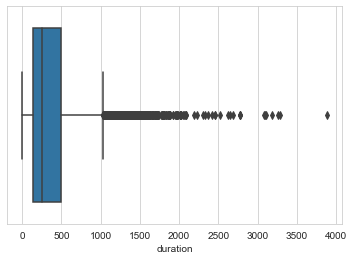

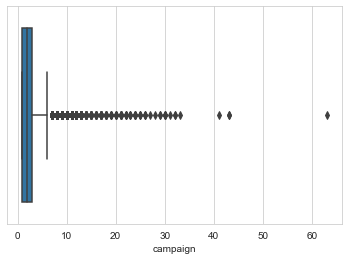

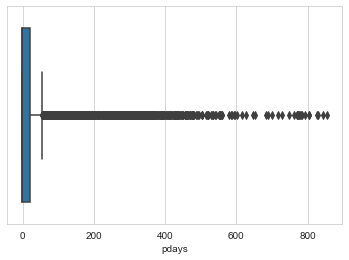

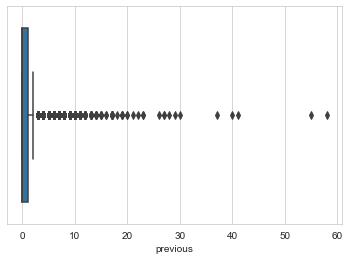

In [8]:
for i in df.columns:
    if df[i].dtypes != 'O':
        sns.boxplot(df[i])
        plt.show()

## Categorical to Ordinal

Since machine learning algorithm doesn't work with text, we need to change categorical data into numbers.

Columns to convert to Ordinal:
- Deposit
- Default
- Housing
- Loan
- Education

In [9]:
df_copy = df.copy()
df_copy['deposit'] = df_copy['deposit'].replace({'yes': 1, 'no': 0})
df_copy['default'] = df_copy['default'].replace({'yes': 1, 'no': 0})
df_copy['housing'] = df_copy['housing'].replace({'yes': 1, 'no': 0})
df_copy['loan'] = df_copy['loan'].replace({'yes': 1, 'no': 0})
df_copy['education'] = df_copy['education'].replace({'tertiary': 3, 'secondary': 2, 'primary': 1, 'unknown': 0})

## Correlation Heatmap

By turning some categorical columns into ordinal data, we can use correlation to see the relationship of the features to the target (deposit). 
We could see that :
- The duration feature correlates the most with the target where the higher the duration the more likely the customer will deposit, but this seems a bit weird to me since it seems like if duration = 0 then deposit will 100% be **no** and this feature might leak the data to the machine learning algorithm.
- **pdays** correlates with the target where the longer the days they're previously contacted the more likely the customer will deposit. This doesn't really makes sense and below i will be removing this feature because there are too many data that has **-1** in it, which stands for never been contacted in previous campaign. The **-1** entries cause the data distribution to skew. Also it is highly correlated to **previous** feature which is why i will remove it.
- **previous** feature somewhat correlates with the target where customers that has been contacted in other previous campaigns are more likely to deposit.
- Customers that doesn't have any sort of loan are more likely to deposit, this is shown from the **loan** and **housing** features correlation towards the target.
- Not really significant but the more we contact the customer during a campaign the less likely the customer will deposit. Maybe we should try other tactic instead of being persistent towards one customer.
- Also not significant but the higher the customer's balance the more likely they will deposit. Which makes sense since they will have extra money to deposit anyway.

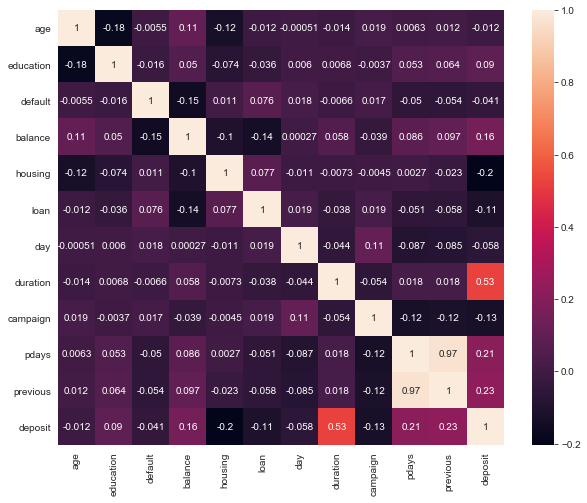

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df_copy.corr('spearman'), annot=True)
plt.show()

## One-Hot Encoding using Get_dummies
Here we turn the rest of categorical columns using OHE since it's not right to turn these features into ordinal data.

There features are:
- Marital
- Job
- Contact
- Month
- Previous Outcome

In [11]:
df_copy.drop(['day'], axis=1, inplace=True)
dum_df = pd.get_dummies(df_copy, columns=['marital', 'job', 'contact', 'month', 'poutcome'], drop_first=True)

## Model Building

Here i use 3 kind of models to train which are simple yet powerful for classification problem:
- Logistic Regression
- Random Forest
- Linear SVM

In [12]:
X = dum_df.drop(['deposit', 'pdays'], axis=1)
y = dum_df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
pipeline_LR = Pipeline([('scale', StandardScaler()),
                       ('clf', LogisticRegression()) ])

tuned_parameters_LR = {
    'clf__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'clf__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'clf__max_iter' : [100, 200, 300]
}

randomCV_LR = RandomizedSearchCV(pipeline_LR, tuned_parameters_LR, cv=5, scoring='accuracy')

In [14]:
pipeline_RF = Pipeline([('scale', StandardScaler()),
                       ('clf', RandomForestClassifier(random_state=0)) ])

tuned_parameters_randomforest = {
    'clf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'clf__n_estimators' : [100, 200, 300]
}

randomCV_RF = RandomizedSearchCV(pipeline_RF, tuned_parameters_randomforest, cv=5, scoring='accuracy')

In [15]:
pipeline_SVC = Pipeline([('scale', StandardScaler()),
                       ('clf', LinearSVC()) ])

tuned_parameters_SVC = {
    'clf__penalty' : ['l1', 'l2'],
    'clf__max_iter' : [100, 500, 1000]
}

randomCV_SVC = RandomizedSearchCV(pipeline_SVC, tuned_parameters_SVC, cv=5, scoring='accuracy')

In [16]:
models = ['LogisticRegression', 'RandomForest', 'LinearSVC']
pipelines = [randomCV_LR, randomCV_RF, randomCV_SVC]
for model, pipeline in zip(models, pipelines):
    print(model, '\n')
    pipeline.fit(X_train, y_train)
    print('Best Score : ', pipeline.best_score_)
    print('Best Params : ', pipeline.best_params_)
    y_score = pipeline.best_estimator_.predict(X_test)
    eval_score = accuracy_score(y_test, y_score)
    print('Accuracy Score on Test Data : ', eval_score)
    print('\n')

LogisticRegression 

Best Score :  0.8262964670750719
Best Params :  {'clf__solver': 'saga', 'clf__penalty': 'none', 'clf__max_iter': 100}
Accuracy Score on Test Data :  0.8240035826242723


RandomForest 

Best Score :  0.8462305325265606
Best Params :  {'clf__n_estimators': 100, 'clf__max_depth': 20}
Accuracy Score on Test Data :  0.8454993282579489


LinearSVC 

Best Score :  0.8236083324707263
Best Params :  {'clf__penalty': 'l2', 'clf__max_iter': 1000}
Accuracy Score on Test Data :  0.8204209583519928




## Model Evaluation

Model chosen for this is Random Forest, it achieved better accuracy than the other 2 algorithms.
The result is good with 84% accuracy, the model could predict both of the result whether it's a **yes** or **no** for deposit.

But it seems like the **duration** feature determines the most from the model's prediction. The reason this attribute highly affects the output target because the duration is not known before a call is performed (e.g., if duration=0 then y='no'). Also, after the end of the call y is obviously known. That's why we will remove this feature and run the model again.

Accuracy Score :  0.8454993282579489 

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1205
           1       0.81      0.87      0.84      1028

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



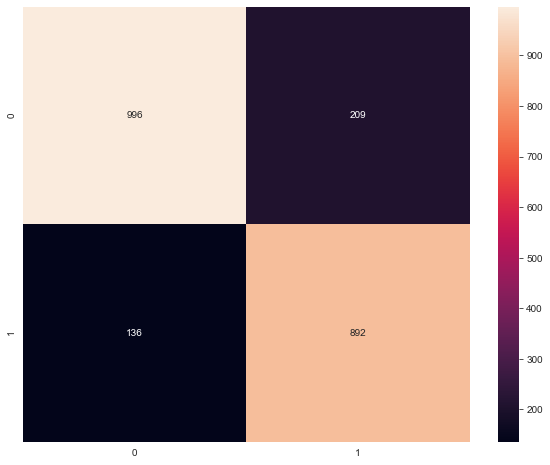

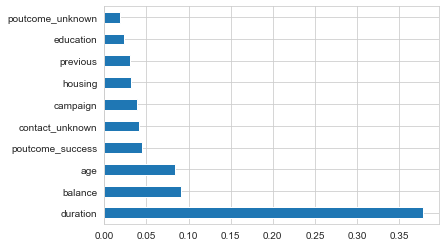

In [17]:
model_chosen = RandomForestClassifier(random_state=0, n_estimators = 300, max_depth=20)
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

model_chosen.fit(X_train_scale, y_train)
y_pred = model_chosen.predict(X_test_scale)
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.show()

feat_importances = pd.Series(model_chosen.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Improving the model by removing a feature

In [18]:
X = dum_df.drop(['deposit', 'duration', 'pdays'], axis=1)
y = dum_df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = ['LogisticRegression', 'RandomForest', 'LinearSVC']
pipelines = [randomCV_LR, randomCV_RF, randomCV_SVC]
for model, pipeline in zip(models, pipelines):
    print(model, '\n')
    pipeline.fit(X_train, y_train)
    print('Best Score : ', pipeline.best_score_)
    print('Best Params : ', pipeline.best_params_)
    y_score = pipeline.best_estimator_.predict(X_test)
    eval_score = accuracy_score(y_test, y_score)
    print('Accuracy Score on Test Data : ', eval_score)
    print('\n')

LogisticRegression 

Best Score :  0.700415494305225
Best Params :  {'clf__solver': 'saga', 'clf__penalty': 'l1', 'clf__max_iter': 300}
Accuracy Score on Test Data :  0.6999552171965965


RandomForest 

Best Score :  0.7182217119770641
Best Params :  {'clf__n_estimators': 300, 'clf__max_depth': 10}
Accuracy Score on Test Data :  0.7218987908643081


LinearSVC 

Best Score :  0.7001916556096124
Best Params :  {'clf__penalty': 'l2', 'clf__max_iter': 500}
Accuracy Score on Test Data :  0.6999552171965965




Accuracy Score :  0.7218987908643081 

              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1205
           1       0.75      0.59      0.66      1028

    accuracy                           0.72      2233
   macro avg       0.73      0.71      0.71      2233
weighted avg       0.73      0.72      0.72      2233



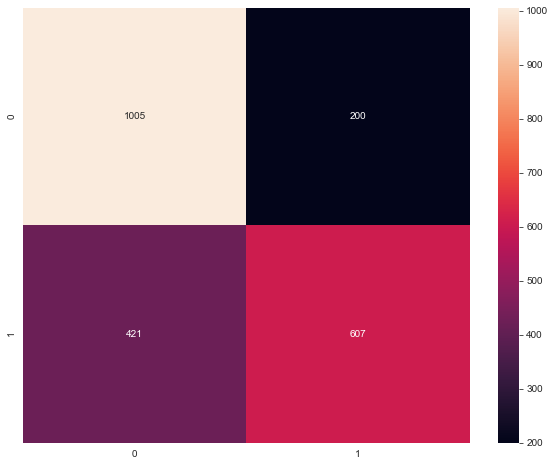

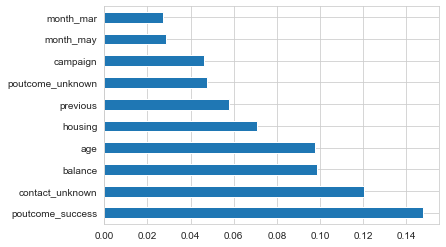

In [19]:
model_chosen = RandomForestClassifier(random_state=0, n_estimators = 300, max_depth=10)
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

model_chosen.fit(X_train_scale, y_train)
y_pred = model_chosen.predict(X_test_scale)
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.show()

feat_importances = pd.Series(model_chosen.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The accuracy score decreased but if we look closely on the confusion matrix, the True Positive doesn't change much, while the True Negative reduced by significant amount. Which means that the **duration** feature cause a data leak where **duration = 0 is always no**. This also means that the **duration** feature shouldn't really affect the machine learning prediction and therefore our machine learning algorithm will be better and know what features helps in determining the deposit prediction.

This is more useful and we could tell our Marketing team to target :
- Customers that had deposit their money in the previous campaign
- Contacting customers through other means besides calling
- Customer with high balance
- Younger customers
- Customer with no loans, especially housing loan